In [1]:
###import the primary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('polygon.csv')

In [3]:
df.head()

,x,y,min.cover,max.cover,mean.cover,count
0,6.048663e+06,4.502820e+06,12.0,99.0,42.285714,7
1,6.049868e+06,4.502334e+06,4.0,95.0,36.100000,10
2,6.050470e+06,4.502450e+06,1.0,81.0,25.800000,5
3,6.050517e+06,4.502125e+06,2.0,87.0,22.857143,7
4,6.051559e+06,4.501431e+06,3.0,97.0,31.500000,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           8435 non-null   float64
 1   y           8435 non-null   float64
 2   min.cover   8435 non-null   float64
 3   max.cover   8435 non-null   float64
 4   mean.cover  8435 non-null   float64
 5   count       8435 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 395.5 KB


In [5]:
##check the null percentage
df.isna().mean()*100


x             0.0
y             0.0
min.cover     0.0
max.cover     0.0
mean.cover    0.0
count         0.0
dtype: float64

In [8]:
##check the duplicate values
df.duplicated().sum()

96

In [3]:
##delete the duplicate values
df=df.drop_duplicates()

In [5]:
df.duplicated().sum()

0

In [11]:
df.sample(2)

,x,y,min.cover,max.cover,mean.cover,count
4686,316439.119280,4.590511e+06,2.0,100.0,76.231481,108
7096,257068.577334,4.433327e+06,1.0,100.0,72.145455,55


(<AxesSubplot:>,)

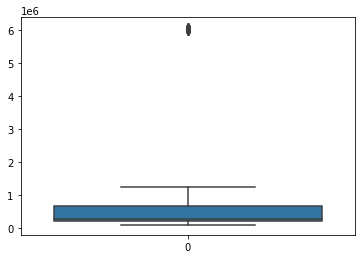

In [15]:
##check the outliers with boxplot
sns.boxplot(data=df.x)

<AxesSubplot:>

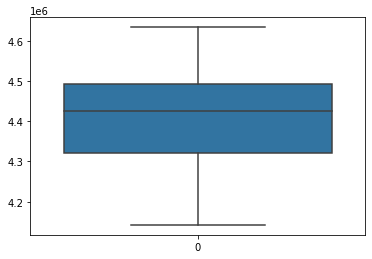

In [17]:
sns.boxplot(data=df.y)

<AxesSubplot:>

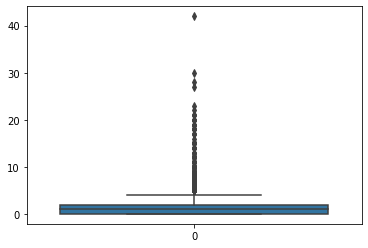

In [20]:
sns.boxplot(data=df['min.cover'])

<AxesSubplot:>

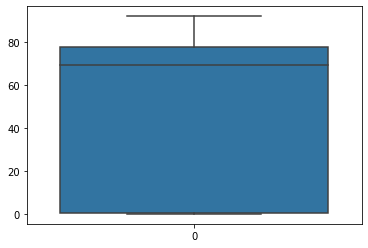

In [23]:
sns.boxplot(data=df['mean.cover'])

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,8339.0,5.218733e+05,929352.801965,8.679534e+04,1.927460e+05,2.739381e+05,6.746330e+05,6.087582e+06
y,8339.0,4.413789e+06,109802.958238,4.142288e+06,4.320774e+06,4.424734e+06,4.492544e+06,4.633598e+06
min.cover,8339.0,1.606400e+00,2.143156,1.000000e-02,2.000000e-02,1.000000e+00,2.000000e+00,4.200000e+01
max.cover,8339.0,6.958413e+01,45.107038,5.700000e-01,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02
mean.cover,8339.0,5.038654e+01,34.280639,2.560000e-01,8.284969e-01,6.948936e+01,7.794341e+01,9.215827e+01
count,8339.0,9.922413e+01,68.991879,1.000000e+00,5.100000e+01,8.500000e+01,1.320000e+02,6.090000e+02


In [6]:
##delete the out liers in min.cover

from scipy import stats
z=np.abs(stats.zscore(df['min.cover']))

In [7]:
(z>3).sum()

121

In [8]:
out_lier=np.where(z>3)

In [33]:
out_lier[0]

array([   0,   11,   32,   34,   37,   38,   41,   42,   43,   45,   49,
         53,   54,   58,   73,   74,   76,   81,   84,   85,   96,  101,
        108,  110,  117,  126,  129,  144,  149,  162,  212,  232,  261,
        300,  324,  341,  382,  424,  455,  507,  628,  778,  804,  859,
        958,  960,  964,  985, 1069, 1070, 1082, 1113, 1157, 1159, 1175,
       1192, 1210, 1254, 1259, 1266, 1269, 1356, 1371, 1445, 1490, 1499,
       1520, 1556, 1560, 1565, 1570, 1575, 1576, 1577, 1591, 1592, 1596,
       1656, 1703, 1726, 1751, 1770, 1796, 1871, 1881, 1884, 1887, 1888,
       1890, 1901, 1926, 1995, 5261, 5580, 5582, 5594, 5595, 5611, 5622,
       6129, 6132, 6392, 6534, 6535, 6642, 6812, 6947, 7098, 7299, 7503,
       7513, 7651, 7879, 7943, 8105, 8154, 8182, 8187, 8225, 8229, 8318],
      dtype=int64)

In [9]:
###drop the outliers
df=df.drop(df.index[out_lier[0]])

In [40]:
df['min.cover'].mode()

0    1.0
dtype: float64

In [43]:
df.loc[12,:]

x             6.051907e+06
y             4.499809e+06
min.cover     1.000000e+00
max.cover     9.200000e+01
mean.cover    2.714286e+01
count         7.000000e+00
Name: 12, dtype: float64

In [10]:
df.reindex()

,x,y,min.cover,max.cover,mean.cover,count
1,6.049868e+06,4.502334e+06,4.0,95.0,36.100000,10
2,6.050470e+06,4.502450e+06,1.0,81.0,25.800000,5
3,6.050517e+06,4.502125e+06,2.0,87.0,22.857143,7
4,6.051559e+06,4.501431e+06,3.0,97.0,31.500000,10
5,6.051490e+06,4.501106e+06,7.0,81.0,25.600000,5
...,...,...,...,...,...,...
8429,4.792494e+05,4.177046e+06,1.0,100.0,61.428571,35
8430,4.790687e+05,4.176777e+06,1.0,100.0,76.603960,101
8431,4.286480e+05,4.143126e+06,3.0,3.0,3.000000,1
8433,4.291280e+05,4.144041e+06,3.0,4.0,3.500000,2


In [11]:
df=df.reset_index()

<AxesSubplot:>

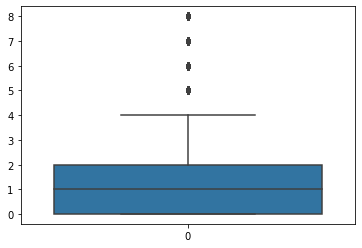

In [12]:
sns.boxplot(data=df['min.cover'])

In [55]:
df.sample(5)

,index,x,y,min.cover,max.cover,mean.cover,count
3413,3600,220128.569616,4.323445e+06,0.01,1.0,0.833435,131
7714,7921,109816.490293,4.450206e+06,1.00,100.0,76.978723,94
3494,3681,221365.338656,4.327661e+06,0.03,1.0,0.699070,43
2257,2444,188068.448044,4.333293e+06,0.03,1.0,0.772593,81
7235,7439,303540.740013,4.323442e+06,2.00,100.0,71.192982,57


In [56]:
df.tail(5)

,index,x,y,min.cover,max.cover,mean.cover,count
8213,8429,479249.384219,4.177046e+06,1.0,100.0,61.428571,35
8214,8430,479068.747727,4.176777e+06,1.0,100.0,76.603960,101
8215,8431,428647.955648,4.143126e+06,3.0,3.0,3.000000,1
8216,8433,429127.955648,4.144041e+06,3.0,4.0,3.500000,2
8217,8434,439212.241362,4.270056e+06,1.0,11.0,7.142857,7


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8218 entries, 0 to 8217
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       8218 non-null   int64  
 1   x           8218 non-null   float64
 2   y           8218 non-null   float64
 3   min.cover   8218 non-null   float64
 4   max.cover   8218 non-null   float64
 5   mean.cover  8218 non-null   float64
 6   count       8218 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 449.5 KB


In [13]:
df=df.drop('index',axis=1)

In [59]:
df.sample(5)

,x,y,min.cover,max.cover,mean.cover,count
7611,241163.850061,4.433865e+06,2.00,100.0,80.909091,99
4010,256084.334984,4.297745e+06,0.01,1.0,0.587895,38
945,670989.107143,4.487492e+06,4.00,100.0,66.678571,56
5770,192285.213697,4.324263e+06,1.00,100.0,56.538462,26
4643,293971.621576,4.598931e+06,1.00,100.0,76.033058,121


In [60]:
df.tail(6)

,x,y,min.cover,max.cover,mean.cover,count
8212,479325.455648,4.177112e+06,1.0,73.0,32.875000,8
8213,479249.384219,4.177046e+06,1.0,100.0,61.428571,35
8214,479068.747727,4.176777e+06,1.0,100.0,76.603960,101
8215,428647.955648,4.143126e+06,3.0,3.0,3.000000,1
8216,429127.955648,4.144041e+06,3.0,4.0,3.500000,2
8217,439212.241362,4.270056e+06,1.0,11.0,7.142857,7


In [61]:
df.loc[11,:]

x             6.052704e+06
y             4.499963e+06
min.cover     1.000000e+00
max.cover     9.900000e+01
mean.cover    3.922222e+01
count         9.000000e+00
Name: 11, dtype: float64

In [30]:
df_1=df.copy()

<AxesSubplot:>

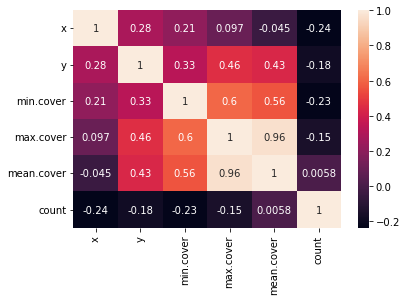

In [62]:
sns.heatmap(data=df.corr(),annot=True)

(array([2627., 3190., 1531.,  550.,  196.,   71.,   30.,   14.,    5.,
           4.]),
 array([  1. ,  61.8, 122.6, 183.4, 244.2, 305. , 365.8, 426.6, 487.4,
        548.2, 609. ]),
 <BarContainer object of 10 artists>)

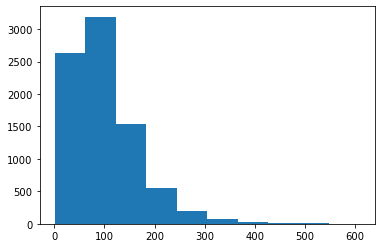

In [65]:
plt.hist(df['count'])

In [119]:
df.sample(5)

,x,y,min.cover,max.cover,mean.cover,count
3662,223497.986971,4.329100e+06,0.05,1.0,0.797959,98
3418,219251.794149,4.322943e+06,0.01,1.0,0.668621,58
1511,699375.000000,4.491720e+06,6.00,100.0,81.568182,44
7779,100753.984189,4.433890e+06,1.00,100.0,80.942623,122
330,728340.000000,4.502750e+06,2.00,100.0,85.380000,200


In [14]:
###separate the dependent and independent variables
X=df.drop('count',axis=1)
y=df['count'].values

In [15]:
####resample the data
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X,y=ros.fit_resample(X,y)

In [16]:
##split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [18]:
###random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
###predict the test values
y_predict=rf.predict(X_test)

In [20]:
##check the model performance
accuracy_score(y_test,y_predict)

0.8213796253997259

In [21]:
###actul value ###
y_test[250]

394

In [22]:
###predicted value####
y_predict[250]

394

In [25]:
y_test[630]

363

In [26]:
y_predict[630]

363